In [13]:
#K_Nearest_Neighbour Value... 

In [59]:
# Import all the Libraries whar we requried , Pandas, Matplotlib, seaborn for Visual, numpy 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [60]:
# Read the CSv frile using Pandas.reader....

df = pd.read_csv('ClassifiedData.csv')

In [62]:
# get top five items to check.... (optional)

df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [123]:
# Except Target class remianing all are Features of Data... and we can observe the data distance between data point tooo near...

Df_dr=df.drop(columns=['TARGET CLASS'],axis=1)

In [64]:
#utility functions and transformer classes to change raw feature vectors into a representation that is more suitable 
#for the downstream estimators

#The preprocessing module further provides a utility class StandardScaler that implements the 
#Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same 
#transformation on the testing set

from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
scaler.fit(Df_dr)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
scaled_feature = scaler.transform(Df_dr)

In [68]:
scaled_feature

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784987],
       ...,
       [ 0.64177715, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602454, -0.85567   ],
       [-0.38765353, -0.59589427, -1.43139809, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [69]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [70]:
df_feat = pd.DataFrame(scaled_feature,columns=df.columns[:-1])

In [72]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [73]:
from sklearn.model_selection import train_test_split

In [84]:
X = df_feat

In [86]:
y = df['TARGET CLASS']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [109]:
from sklearn.neighbors import KNeighborsClassifier 

In [110]:
Knn = KNeighborsClassifier(n_neighbors=1)

In [111]:
Knn.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [112]:
pred = Knn.predict(X_test)

In [113]:
from sklearn.metrics import classification_report,confusion_matrix

In [114]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       141

   micro avg       1.00      1.00      1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

[[159   0]
 [  0 141]]


In [117]:
error_rate = []
for i in range(1,40): # K avlues
    Knn=KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train,y_train)
    pred_i=Knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

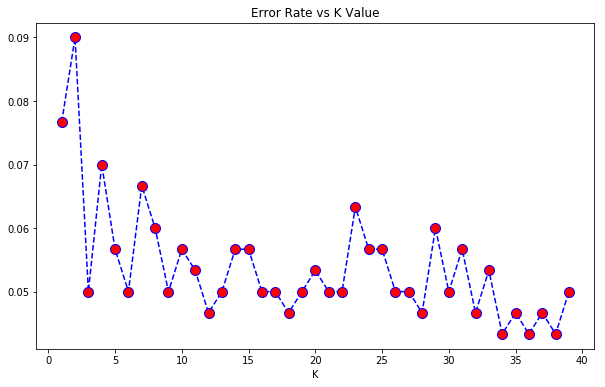

In [121]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylable('Error Rate')

In [122]:
Knn = KNeighborsClassifier(n_neighbors=17)
Knn.fit(X_train,y_train)
pred=Knn.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

[[153   6]
 [  9 132]]
